In [1]:
import numpy as np
import random, math
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, KMeans, SpectralClustering
from sklearn.metrics import pairwise_distances
from utils import generate_data

Generate data

In [2]:
X1, X2, X3 = generate_data()

Plot data

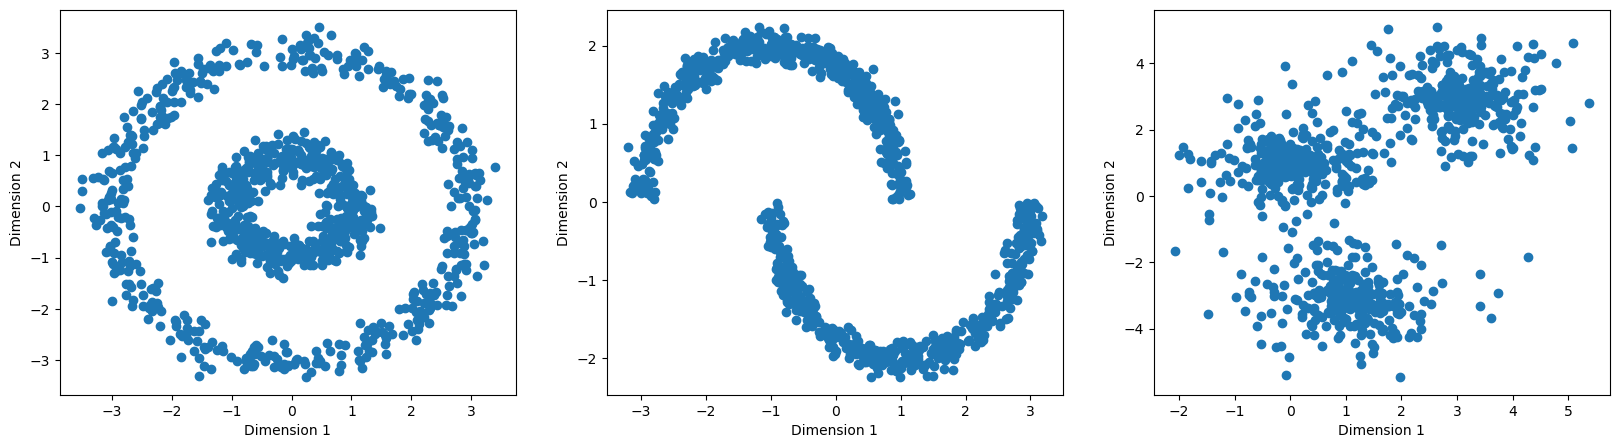

In [3]:
# Viz scatter plot
fig, ax = plt.subplots(1,3,figsize=(20,5))
for i,data in enumerate([X1, X2, X3]):
    ax[i].scatter(data[:,0],data[:,1])
    ax[i].set_ylabel('Dimension 2')
    ax[i].set_xlabel('Dimension 1')
    

Fit clustering techniques and viz

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


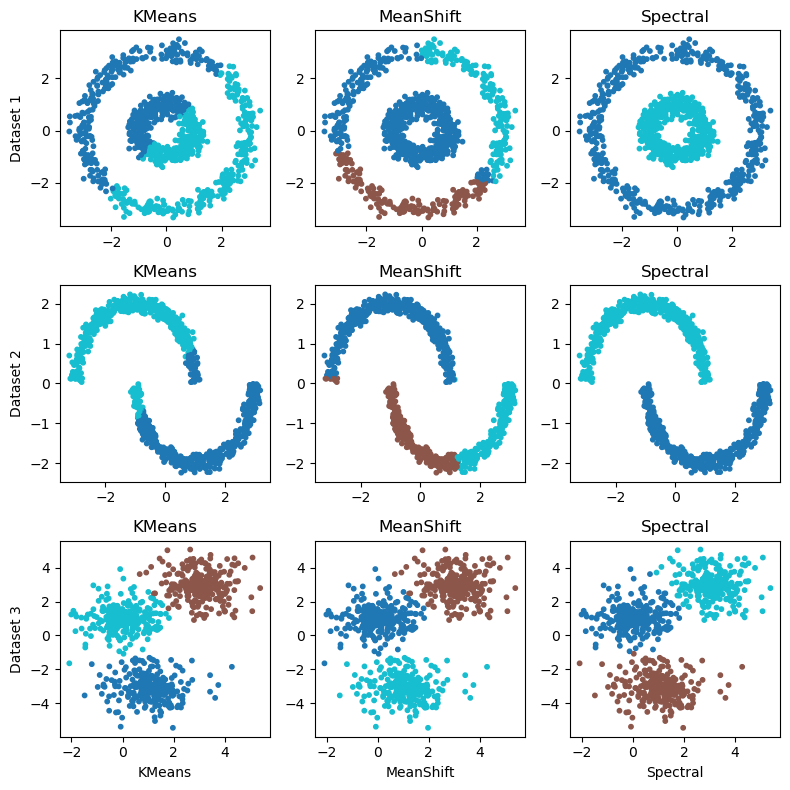

In [4]:
datasets = [(X1, 2), (X2, 2), (X3, 3)]  # (dataset, K)
methods = ["KMeans", "MeanShift", "Spectral"]

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for row, (X, K) in enumerate(datasets):

    # KMeans
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans_labels = kmeans.fit_predict(X)
    axes[row, 0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap="tab10", s=10)
    axes[row, 0].set_title("KMeans")

    # MeanShift
    dists = pairwise_distances(X)
    triu = dists[np.triu_indices_from(dists, k=1)]
    bandwidth = np.quantile(triu, 0.2)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms_labels = ms.fit_predict(X)
    axes[row, 1].scatter(X[:, 0], X[:, 1], c=ms_labels, cmap="tab10", s=10)
    axes[row, 1].set_title(f"MeanShift")

    # Spectral
    sc = SpectralClustering(n_clusters=K, affinity="nearest_neighbors", random_state=0)
    sc_labels = sc.fit_predict(X)
    axes[row, 2].scatter(X[:, 0], X[:, 1], c=sc_labels, cmap="tab10", s=10)
    axes[row, 2].set_title("Spectral")

    # Label
    axes[row, 0].set_ylabel(f"Dataset {row+1}")

for col, method in enumerate(methods):
    axes[2, col].set_xlabel(method)

plt.tight_layout()
plt.savefig('media/clustering_comparison.png')
plt.show()